# **Projeto Titanic - Introdução à Ciência de Dados**

Amanda Caroline de Oliveira Pires

12559090

## **Bibliotecas e Funções**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set_style('whitegrid')

In [43]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import LinearSVC
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibrationDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

---

## **Leitura dos dados**

In [44]:
test = pd.read_csv('/content/test.csv', header=(0))
train = pd.read_csv('/content/train.csv', header=(0))

#display(test)
#display(train)

# Verificando a quantidade de linhas e colunas em ambas as bases

print("Número de linhas e colunas no conjunto de treinamento:", train.shape)
print("Número de linhas e colunas no conjunto de teste:", test.shape)
attributes = list(train.columns)

Número de linhas e colunas no conjunto de treinamento: (891, 12)
Número de linhas e colunas no conjunto de teste: (418, 11)


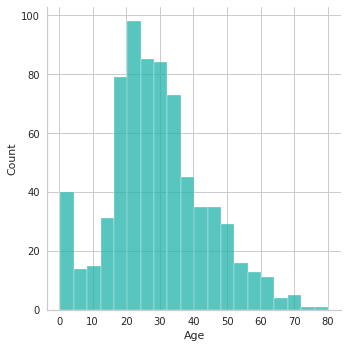

In [45]:
# Distribuição da idade dos passageiros
sns.displot(train['Age'], color = '#20B2AA')

## **Limpeza e normalização dos dados**

Alguns atributos são irrelavantes para analisar os dados, então removeremos os seguintes atributos dos conjuntos de teste e treinamento: **"PassengerId"**, **"Name"**, **"Ticket"** e **"Cabin"**.

O atributo "PassengerId" só será relevante no final, quando formos submeter a solução no Kaggle e comparar a coluna de ID do passageiro com a coluna "Survived" que informa se o passageiro sobreviveu ou não, sendo assim, guardaremos essa informação.

In [46]:
train.drop(['PassengerId','Name', 'Ticket', 'Cabin'],axis = 1, inplace = True)
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [47]:
PassengerId_test = test['PassengerId']

## **Análise exploratória dos dados**

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [49]:
# Verificando dados nulos
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [50]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [51]:
# Salvando o ID do passageiro
PassengerId_test = test['PassengerId']

# Removendo atributos desnecessários
test.drop(['PassengerId','Name', 'Ticket', 'Cabin'],axis = 1, inplace = True)
test.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [53]:
# Valores nulos
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [54]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


Identificamos 177 valores nulos no atributo "Age" e 2 no "Embarked" do conjunto de treino. No conjunto de teste, 86 no atributo "Age" e 1 no "Fare".

Vamos atribuir valores médios às entradas nulas nos dados numéricos e a moda nos atributos nominais.

In [55]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train['Fare'] = train['Fare'].fillna(train['Fare'].mean())

test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [56]:
# sem valores nulos no conjunto de treinamento
train.isnull().sum().sort_values(ascending=False).head(10)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [57]:
# sem valores nulos no conjunto de teste
test.isnull().sum().sort_values(ascending=False).head(10)

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [58]:
# transformando atributos nominais em numéricos usando "one-hot-enconding"
train_original = train
train = pd.get_dummies(train)
train.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
5,0,3,29.699118,0,0,8.4583,0,1,0,1,0
6,0,1,54.000000,0,0,51.8625,0,1,0,0,1
7,0,3,2.000000,3,1,21.0750,0,1,0,0,1
8,1,3,27.000000,0,2,11.1333,1,0,0,0,1
9,1,2,14.000000,1,0,30.0708,1,0,1,0,0


In [59]:
test = pd.get_dummies(test)
test.head(6)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1
5,3,14.0,0,0,9.2250,0,1,0,0,1


In [60]:
# Convertendo os dados para o formato numpy para realizarmos a classificação

data_train = train.to_numpy()
nrow,ncol = data_train.shape
y_train = data_train[:,0]
X_train = data_train[:,1:ncol]

In [61]:
# Convertendo os dados para o formato numpy para realizarmos a classificação

data_test = test.to_numpy()
nrow,ncol = data_test.shape
y_test = data_test[:,0]
X_test = data_test[:,1:ncol]

In [62]:
# Para o conjunto de teste

data_test = test.to_numpy()
X_test = data_test

Vamos verificar se as classes estão balanceadas

Text(0.5, 1.0, 'Número de elementos em cada classe')

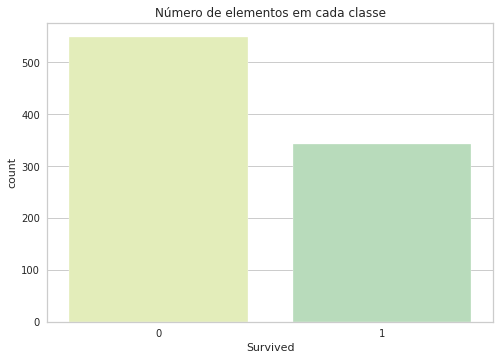

In [64]:
sns.countplot(data = train, x = 'Survived')
sns.set_palette('YlGnBu')
plt.title('Número de elementos em cada classe')

In [65]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [66]:
# Normalização dos dados

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

print('Dados transformados:')
print('Media: ', np.mean(X_train, axis = 0))
print('Desvio Padrao:', np.std(X_train, axis = 0))

print('Dados transformados:')
print('Media: ', np.mean(X_test, axis = 0))
print('Desvio Padrao:', np.std(X_test, axis = 0))

Dados transformados:
Media:  [-8.77213254e-17  2.23290646e-16  4.38606627e-17  5.38289951e-17
  3.98733297e-18  3.98733297e-17 -1.15632656e-16 -1.99366649e-17
  0.00000000e+00 -8.37339924e-17]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Dados transformados:
Media:  [-0.05156969  0.04413122 -0.06863058  0.01334498  0.06892064  0.02349348
 -0.02349348  0.14180391  0.08409087 -0.1771445 ]
Desvio Padrao: [1.00625661 0.97111866 0.81269066 1.21679298 1.12298531 1.00695788
 1.00695788 1.09804783 1.11376674 1.07106262]


## **Análise descritiva dos dados**

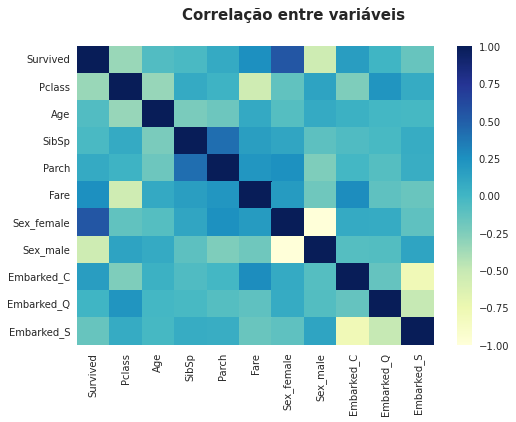

In [67]:
# Verificando a correlação entre as variáveis

sns.heatmap(train.corr(), cmap='YlGnBu')
plt.suptitle('Correlação entre variáveis', fontsize=15, fontweight='bold')
plt.show()

Ao analisar o gráfico de calor podemos concluir que os atributos **não** são fortemente correlacionados. Além disso, mulheres sobreviveram mais do que os homens.
Outra observação importante é que quanto menor o número na Pclass, maior o número em sobrevivência. Quanto menor o número na Pclasse, maior o status e por conseguinte maior sua taxa de sobrevivência.

Vamos analisar os dados de arcordo com o gênero. Observamos que a taxa de sobrevivência dos homens foi em torno de 25%, enquanto que a das mulheres, de 75%. Portanto, saber se o passageiro era homem ou mulher é uma informação importante a ser levada em conta na classificação

Text(0.5, 1.0, 'Taxa de sobrevivência de acordo com o sexo')

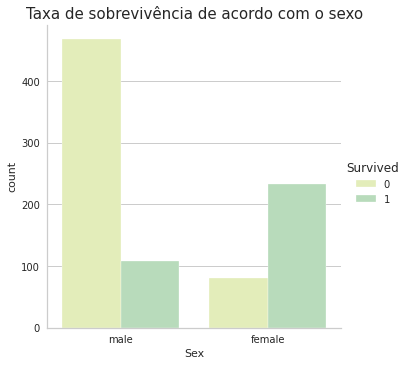

In [68]:
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = train_original)
plt.title('Taxa de sobrevivência de acordo com o sexo', fontsize=15)

Vamos analisar a relação entre a classe do passageiro e se o passageiro sobreviveu. Conforme observamos a seguir, grande parte das mortes ocorreram entre os passageiros da terceira classe. Portanto, essa informação também é importante para classificarmos os passageiros em sobreviventes.

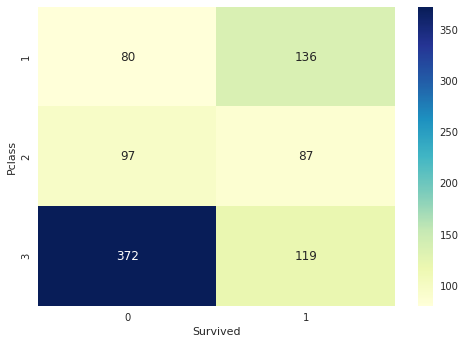

In [69]:
group = train_original.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
sns.heatmap(pclass_survived, annot = True, fmt ="d", cmap='YlGnBu')

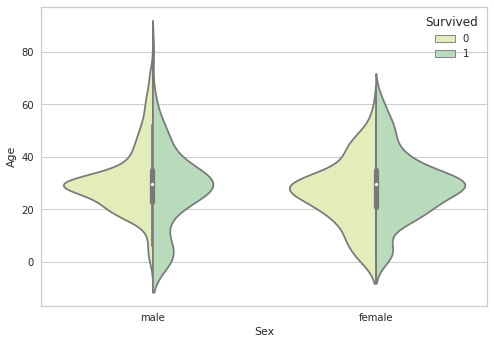

In [70]:
# Comparando idade e sobrevivência

sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = train_original, split = True)

De acordo com a idade, vemos que boa parte das crianças sobreviveram. Ademais, as mulheres com mais idade e os homens mais jovens apresentaram uma chance maior de sobrevier.

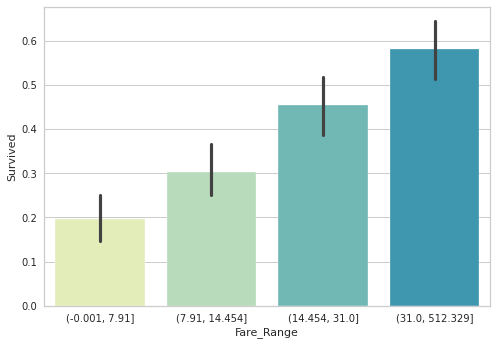

In [71]:
# Comparação tipo de bilhete e chance de sobrevivência

# Divide Fare into 4 bins
train_original['Fare_Range'] = pd.qcut(train_original['Fare'], 4)
 
# Mostra valores aproximados com base na altura das barras
sns.barplot(x ='Fare_Range', y ='Survived',
data = train_original)

Como visto anteriormente quanto mais caro o bilhete, maior é a chance de sobrevivência, o que reforça que classe de embarque é uma variável importante.

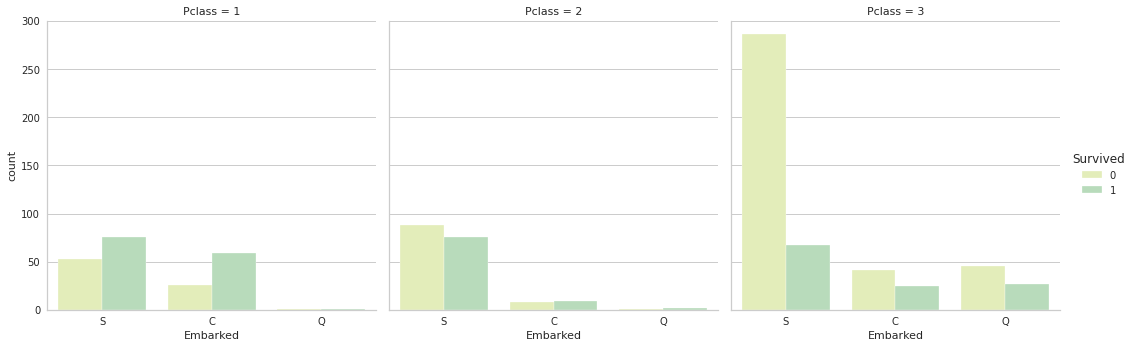

In [72]:
# Comparando ponto de embarque e taxa de sobrevivência 
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = train_original)



*   Os passageiros que viajaram na 1ª Classe possuem mais que o dobro de chances de sobreviverem em relação aos que compraram a 3ª Classe
*   A maioria dos sobreviventes são do porto de Southampton (S).

* Em Queenstown (Q) embaracaram a maioria dos passageiros da terceira classe.



## **Agrupamento**

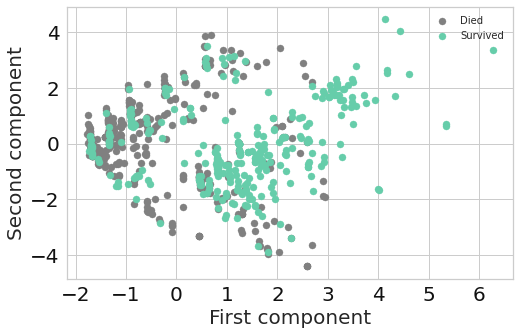

In [73]:
# Separação entre as classes realizando a projeção dos atributos em duas dimensões usando PCA.
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train)

classes = np.unique(y_train)

colors = ['Grey', '#66CDAA', 'r', 'c', 'm', 'b', 'k', 'w']
aux = 0
plt.figure(figsize=(8,5))
for c in classes:
    if c == 1:
        lb = 'Survived'
    else:
        lb = 'Died'
    nodes = np.where(y_train == c)
    plt.scatter(pca_result[nodes,0], pca_result[nodes,1], s=50, color = colors[aux], 
                label = lb)
    aux = aux + 1
 
plt.legend()
plt.xlabel("First component", fontsize=20)
plt.ylabel("Second component", fontsize=20)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show(True)

### **Método k-means**

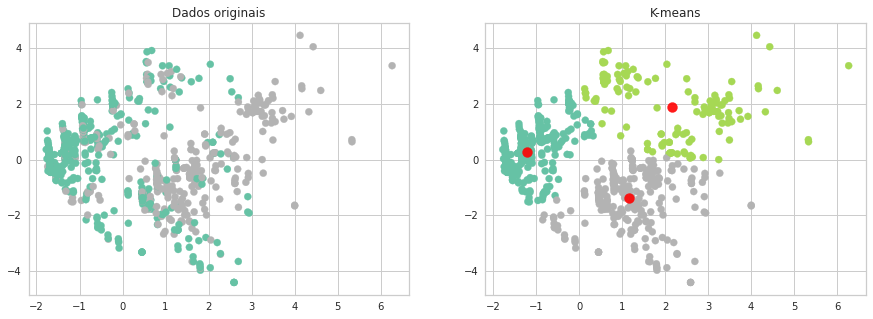

In [74]:
k = 3 # numero de clusters a serem identificados
# define o método com k clusters
kmeans = KMeans(n_clusters=k) 
# realiza o ajuste considerando os dados X
kmeans.fit(pca_result)
# faz a predição, identificando os clusters
y_km = kmeans.fit_predict(pca_result)

plt.figure(figsize=(15,5))
# mostra o primeiro gráfico
plt.subplot(1, 2, 2)
plt.scatter(pca_result[:,0], pca_result[:,1], c=y_km, cmap='Set2', s=50)
plt.title('K-means')
centers = kmeans.cluster_centers_
# mostra os centróides obtidos
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.9); 

# mostra o segundo gráfico
plt.subplot(1,2, 1)
plt.scatter(pca_result[:,0], pca_result[:,1], c=y_train, cmap='Set2', s=50)
plt.title('Dados originais')
plt.show(True)

# **Avaliação**

## **Silhouette Score**

Encontrando um número ideal de clusters no agrupamento K-means

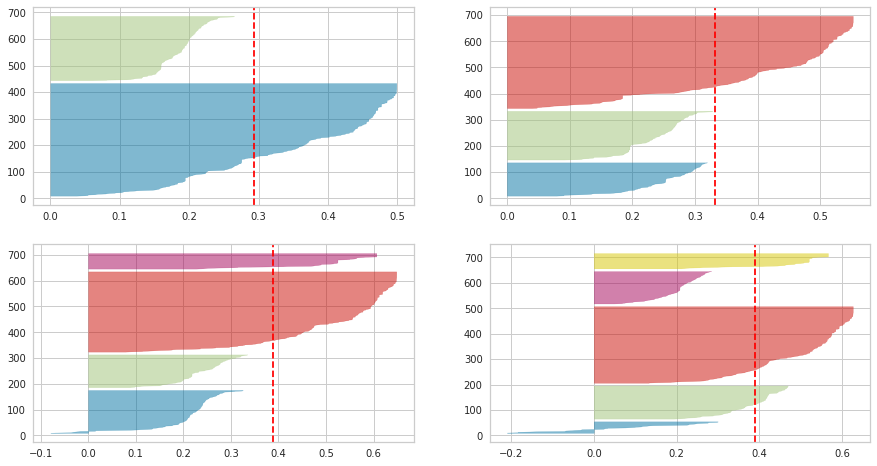

In [109]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_train)

Para uma boa escolha de k, devemos nos atentar ao número de clusters onde o gráfico de todos os clusters está além da pontuação média do Silhouette, apresentar espessura uniforme e sem grandes flutuações no tamanho.
Analisando os gráficos, concluímos que o k=3 é ideal para ser utilizado no método k-means.

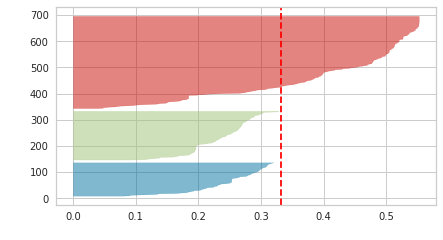

## **Seleção e ajuste do modelo**

In [85]:
X = train.drop('Survived', axis=1)
y = train.Survived
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [86]:
LRM = LinearRegression().fit(X_train, y_train)
LR = LogisticRegression().fit(X_train, y_train)
KNN = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
gaussian = GaussianNB().fit(X_train, y_train)
RF = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
svc = SVC().fit(X_train, y_train)

In [87]:
models = [LRM, LR, KNN, gaussian, RF, svc]

comparison = pd.DataFrame({
    'Model': ['LRM', 
              'Logistic Regression', 
              'KNN', 
              'Naive Bayes',
              'Random Forest',
              'SVC'],
    'Score': [i.score(X_train, y_train) for  i in models],
    'MSE': [metrics.mean_squared_error(y_test, i.predict(X_test)) for i in models]})

comparison_df = comparison.sort_values(by='Score', ascending=False).reset_index(drop=True).set_index('Model')

comparison_df.iloc[:]

,Score,MSE
Model,,
Random Forest,0.968575,4.966507
KNN,0.842873,4.724880
SVC,0.842873,4.940191
Logistic Regression,0.800224,4.732057
Naive Bayes,0.791246,4.617225
LRM,0.398159,4.519807


## **Random Forest**

In [88]:
y_pred = RF.predict(X_test) 
y_pred = np.array(y_pred, dtype = int)
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-RF.csv', index = False)

**Pontuação: 0,74401**

## **KNN**

In [80]:
y_pred = KNN.predict(X_test) 
y_pred = np.array(y_pred, dtype = int)
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-KNN.csv', index = False)

**Pontuação: 0,77511**

## **Logistic Regression**

In [82]:
y_pred = LR.predict(X_test) 
y_pred = np.array(y_pred, dtype = int)
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-LR.csv', index = False)

**Pontuação: 0,76794**

## **Naive Bayes**

In [83]:
y_pred = gaussian.predict(X_test) 
y_pred = np.array(y_pred, dtype = int)
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-NB.csv', index = False)

**Pontuação: 0,75358**

## **Linear Regression**

In [84]:
y_pred = LRM.predict(X_test) 
y_pred = np.array(y_pred, dtype = int)
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-LRM.csv', index = False)

**Pontuação: 0,64832**

## **SVC**

In [89]:
y_pred = svc.predict(X_test) 
y_pred = np.array(y_pred, dtype = int)
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-SVC.csv', index = False)

**Pontuação: 0,7799**

Portanto, o Support Vector Classifier (**SVC**) foi o classificador com melhor pontuação na plataforma Kaggle, com score de aproximadamente **0,78**.